## COVID-19 Daily Analysis Table  
  - source:  official data collected by John Hopkins, Stats by Country,  https://github.com/CSSEGISandData/ 
  - worst daily deaths by country evaluating last 7 days
  - charts:  https://dasn.herokuapp.com/covidzoom compare, and https://dasn.herokuapp.com/covid19
  - SUMMARY WARNING ON COUNTRIES BY COVID DAILY DEATH RATES 

In [19]:
try:  ## This table sumarizes the daily deaths by country (calculations below)   %store df9  
    display(df9.transpose().tail(3) )
    print("worst daily deaths by country evaluating last 7 days:")
    display(df9.transpose().tail(9).head(9).mean(axis=0).sort_values(ascending=False).head(7) )
except NameError:
    print("Click Run on this cell only after the RUN ALL completes all calculations")

Country/Region,US,France,Italy,United Kingdom,Spain,Germany,Belgium,Brazil,Turkey,Canada,Iran,Ireland,Netherlands,Peru,Russia,Sweden
4/18/20,1891,642,482,888,41,107,290,213,121,0,73,41,142,48,40,111
4/19/20,1997,395,433,596,410,127,230,108,127,132,87,39,83,52,48,29
4/20/20,1433,547,454,449,399,276,145,125,123,119,91,77,67,45,44,40


worst daily deaths by country evaluating last 7 days:


Country/Region
US                2403.555556
United Kingdom     737.111111
France             714.777778
Italy              516.222222
Spain              471.777778
Belgium            275.777778
Germany            236.222222
dtype: float64

### How is this daily Calculus performed :   https://github.com/infchg/COVID-19
  - calculations in iPython at  https://github.com/infchg/COVID-19/JH-calculate-daily.ipynb
  - source data https://github.com/CSSEGISandData/COVID-19/
  - resources thanks to  http://Jupyter.org  http://MyBinder.org  http://Heroku.com

In [2]:
!pip install pandas seaborn
# initial installations 

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 10.0 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 29.7 MB/s eta 0:00:01
     |████████████████████████████████| 20.2 MB 36.4 MB/s eta 0:00:01
     |████████████████████████████████| 509 kB 51.2 MB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 73.2 MB/s eta 0:00:01
     |████████████████████████████████| 26.1 MB 57.6 MB/s eta 0:00:01    |████████▏                       | 6.7 MB 57.6 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 8.8 MB/s  eta 0:00:01
     |████████████████████████████████| 88 kB 12.1 MB/s eta 0:00:01


In [3]:
 ##JH Source THIS IS THE SOURCE OF ALL CALCULATIONS IN THIS PAGE
! curl -OL https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   213  100   213    0     0   2028      0 --:--:-- --:--:-- --:--:--  2028
100 59930  100 59930    0     0   225k      0 --:--:-- --:--:-- --:--:--  225k


In [4]:
# ! egrep -e ',[0-9]{3,}$' -e ^Provi  -e ',[6-9].$' tim*dea*csv > over50.csv
! egrep -e ',[^,][^,][^,]+$' -e ^Provi   tim*dea*csv > over50.csv
import pandas as pd
df=pd.read_csv('over50.csv')
df.set_index('Country/Region',inplace=True)  # .T
type(df)

pandas.core.frame.DataFrame

In [5]:
cols20 = df.columns[-13:].tolist()
idx = cols20 # cols21 = df.columns[-14:-1].tolist()
#display( )idx=['Country/Region']+cols20   #no need with set index
display(df.sort_values(by=[df.columns[-1]],ascending=False)[cols20] )

,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
Country/Region,,,,,,,,,,,,,
US,14695,16544,18586,20462,22019,23528,25831,28325,32916,36773,38664,40661,42094
Italy,17669,18279,18849,19468,19899,20465,21067,21645,22170,22745,23227,23660,24114
Spain,14792,15447,16081,16606,17209,17756,18056,18708,19315,20002,20043,20453,20852
France,10869,12210,13197,13832,14393,14967,15729,17167,17920,18681,19323,19718,20265
United Kingdom,7097,7978,8958,9875,10612,11329,12107,12868,13729,14576,15464,16060,16509
Belgium,2240,2523,3019,3346,3600,3903,4157,4440,4857,5163,5453,5683,5828
Iran,3993,4110,4232,4357,4474,4585,4683,4777,4869,4958,5031,5118,5209
Germany,2349,2607,2767,2736,3022,3194,3294,3804,4052,4352,4459,4586,4862
China,3213,3215,3216,3219,3219,3221,3221,3222,3222,4512,4512,4512,4512


In [6]:
#df['LastDay']=df[df.columns[-1]]-df[df.columns[-2]] 
df0=df[idx].copy()  #()
type(df)
#for (coln, cold) in df.iteritems():
#    print(coln, '->', cold)
for i in range(1,13):
         df0[df0.columns[-i]] =    (df0[df.columns[-i]]-df0[df0.columns[-i-1]]) # casualties last day

## COVID Daily deaths 
Spain Italy US France UK Netherlands Iran Germany (updated March-30th)   

In [7]:
df0.pop( df0.columns[0] )   # 0 
df9=df0.sort_values(by=[df.columns[-1]],ascending=False).head(16)
display(df9) 

,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
Country/Region,,,,,,,,,,,,
US,1849,2042,1876,1557,1509,2303,2494,4591,3857,1891,1997,1433
France,1341,987,635,561,574,762,1438,753,761,642,395,547
Italy,610,570,619,431,566,602,578,525,575,482,433,454
United Kingdom,881,980,917,737,717,778,761,861,847,888,596,449
Spain,655,634,525,603,547,300,652,607,687,41,410,399
Germany,258,160,-31,286,172,100,510,248,300,107,127,276
Belgium,283,496,327,254,303,254,283,417,306,290,230,145
Brazil,131,107,67,99,105,204,204,188,217,213,108,125
Turkey,96,98,95,97,98,107,115,125,126,121,127,123


In [8]:
print(','.join('Mr%.0f' %x for x in range(18,30+1))  ,'\ndata-datasets="')
print('"\ndata-datasets="'.join(','.join('%.0f' %x for x in y) for y in df9.values) )

Mr18,Mr19,Mr20,Mr21,Mr22,Mr23,Mr24,Mr25,Mr26,Mr27,Mr28,Mr29,Mr30 
data-datasets="
1849,2042,1876,1557,1509,2303,2494,4591,3857,1891,1997,1433"
data-datasets="1341,987,635,561,574,762,1438,753,761,642,395,547"
data-datasets="610,570,619,431,566,602,578,525,575,482,433,454"
data-datasets="881,980,917,737,717,778,761,861,847,888,596,449"
data-datasets="655,634,525,603,547,300,652,607,687,41,410,399"
data-datasets="258,160,-31,286,172,100,510,248,300,107,127,276"
data-datasets="283,496,327,254,303,254,283,417,306,290,230,145"
data-datasets="131,107,67,99,105,204,204,188,217,213,108,125"
data-datasets="96,98,95,97,98,107,115,125,126,121,127,123"
data-datasets="41,25,48,39,32,75,52,143,58,0,132,119"
data-datasets="117,122,125,117,111,98,94,92,89,73,87,91"
data-datasets="28,24,33,14,31,41,38,42,44,41,39,77"
data-datasets="148,115,132,94,86,122,189,181,144,142,83,67"
data-datasets="17,31,12,12,23,14,24,20,26,48,52,45"
data-datasets="13,18,12,24,18,22,28,34,41,40,48,44"
data-datasets="106,77,17

In [9]:
dxy=df0.transpose()
display(dxy.tail(4)) #pivot('Country/Region')

Country/Region,Algeria,Argentina,Austria,Bangladesh,Belgium,Brazil,Canada,Canada,Chile,China,...,Russia,Saudi Arabia,Serbia,Spain,Sweden,Switzerland,Turkey,Ukraine,United Kingdom,US
4/17/20,16,8,21,15,306,217,34,58,11,1290,...,41,4,7,687,67,46,126,9,847,3857
4/18/20,3,6,12,9,290,213,40,0,10,0,...,40,5,7,41,111,41,121,8,888,1891
4/19/20,8,3,9,7,230,108,27,132,7,0,...,48,5,5,410,29,25,127,8,596,1997
4/20/20,9,4,18,10,145,125,33,119,6,0,...,44,6,3,399,40,36,123,10,449,1433


In [10]:
#Worst 7 countries in daily deaths last week 
df9.transpose().tail(8).head(7).mean(axis=0).sort_values(ascending=False).head(7)    #1 Average for each row :

Country/Region
US                2663.142857
United Kingdom     778.285714
France             760.714286
Italy              537.285714
Spain              463.428571
Belgium            297.571429
Germany            223.428571
dtype: float64

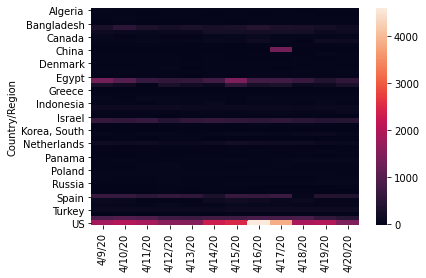

In [11]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df0)#, annot=True

###  Daily casualties Heat Map 
   in order of daily casualties : Italy Spain US France UK Iran Netherlands 

49 16.416666666666668


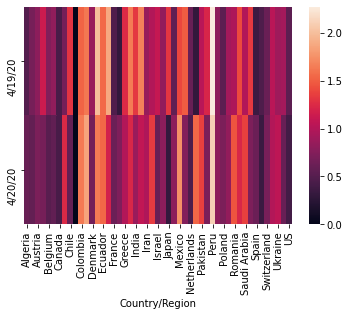

In [12]:
print( len(dxy.columns) ,dxy['Austria'].tail(20).mean() ) #   with ()   sns.heatmap(dxy)
drel=dxy.copy()
for r in drel.columns:
    #print (r,    drel[r].tail(5).mean() )
    drel[r] =  drel[r] / drel[r].tail(11).mean()
    
dinc=df0.copy()  #increase 
Days2 = dxy.tail(2).mean() 
Days4 = dxy.tail(5).head(2).mean() 
increaserate=round(Days2/Days4,1)
#display( increaserate )
   
for i in range(1,6):
         dinc[df0.columns[-i]] =    (df0[df0.columns[-i]]+df0[df0.columns[-i-1]])  /  (df0[df0.columns[-i-4]]+df0[df0.columns[-i-3]])  
        
sns.heatmap(dinc.transpose().tail(2))    

In [13]:
print("By worst aspect due exponential increase: Sweden UK US Belgium Germany \n Strangely constant : Iran , Recovered: China ")
#drel.loc[['3/27/20']].transpose().sort_values(by=[df.columns[-1]],ascending=False)
drel.iloc[[-1]].transpose().sort_values(by=[df.columns[-1]],ascending=False)

By worst aspect due exponential increase: Sweden UK US Belgium Germany 
 Strangely constant : Iran , Recovered: China 


,4/20/20
Country/Region,
Norway,2.410959
Ireland,1.997642
Canada,1.810512
Peru,1.612378
Ecuador,1.544681
Russia,1.471125
Bangladesh,1.375000
Germany,1.346341
Romania,1.291304


In [14]:
%matplotlib inline
#dxy.plot(xticks=dxy.index,yticks=dxy.Austria)

In [15]:
!pip install chart-studio urllib3 # plotly

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 64 kB 1.9 MB/s eta 0:00:011
     |████████████████████████████████| 7.1 MB 10.2 MB/s eta 0:00:01     |██▏                             | 481 kB 10.2 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=b01108809d6b1c1b334365ebbbd117c8675f4a7b1cb9da7900be823a51e4d9d0
  Stored in directory: /home/jovyan/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
